In [20]:
pip install --upgrade tensorflow


In [10]:
# importing required libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from os import listdir
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
# fitting the CNN to the image
train_datagen= ImageDataGenerator(rescale=1./255,
                                  shear_range=2.0,
                                  zoom_range=2.0,
                                  horizontal_flip=True)

In [13]:
# Generating image for test set
test_datagen=ImageDataGenerator(rescale=1./255)
# generating training data set
training_set= train_datagen.flow_from_directory(r"D:\Datasets\dogs_vs_cats\train",
                                                target_size=(64,64),
                                                batch_size=32,
                                                class_mode= 'binary')
# generating test data set
test_set= test_datagen.flow_from_directory(r"D:\Datasets\dogs_vs_cats\test",
                                                target_size=(64,64),
                                                batch_size=32,
                                                class_mode= 'binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [22]:
# from keras.models import Sequential
# from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
# from keras import backend as K

# Check the value of floatx
# print(K.floatx())

# Change floatx if necessary (optional)
# K.set_floatx('float32')

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape=(64, 64, 3), activation='relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

In [15]:
# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
classifier.fit_generator(training_set, steps_per_epoch=8000, epochs=10, validation_data=test_set, validation_steps=2000)

# classifier.fit_generator(training_set, steps_per_epoch=8000, epochs=25, validation_data=test_set, validation_steps=2000)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9288\238484864.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set, steps_per_epoch=8000, epochs=10, validation_data=test_set, validation_steps=2000)


Epoch 1/10


8000/8000 [==============================] - 641s 79ms/step - loss: 0.6721 - accuracy: 0.5752 - val_loss: 0.6276 - val_accuracy: 0.6432


In [16]:
#to predict new images 
import cv2

def predict_image(imagepath, classifier):
    predict = image.load_img(imagepath, target_size = (64, 64))   
    predict_modified = image.img_to_array(predict)
    predict_modified = predict_modified / 255
    predict_modified = np.expand_dims(predict_modified, axis = 0)
    result = classifier.predict(predict_modified)
    if result[0][0] >= 0.6:
        test_img=cv2.imread(imagepath)
        plt.imshow(test_img)
        prediction = 'dog'
        probability = result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    else:
        prediction = 'cat'
        test_img=cv2.imread(imagepath)
        plt.imshow(test_img)
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
        
# path=r"C:\Users\Admin\Downloads\cat_test_img.jpeg"
# predict_image(path,classifier)

1/1 [==============================] - 0s 410ms/step
probability = 0.9594056
Prediction = dog


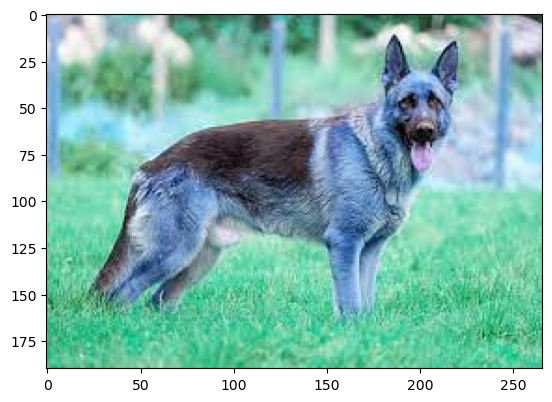

In [17]:
from keras.preprocessing import image
# import numpy as np
path=r"C:\Users\Admin\Downloads\dog_test_img.jpeg"
predict_image(path,classifier)

1/1 [==============================] - 0s 269ms/step
probability = 0.5568071007728577
Prediction = cat


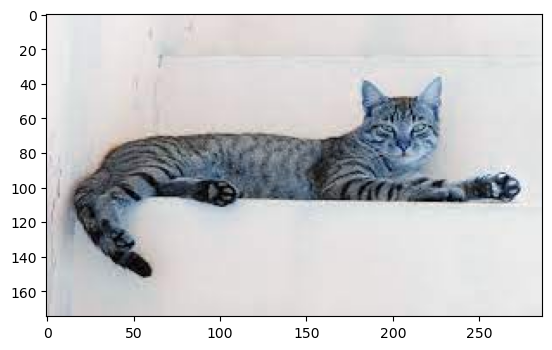

In [23]:
path=r"C:\Users\Admin\Downloads\catimg.jpeg"
predict_image(path,classifier)

1/1 [==============================] - 0s 87ms/step
probability = 0.6173864305019379
Prediction = cat


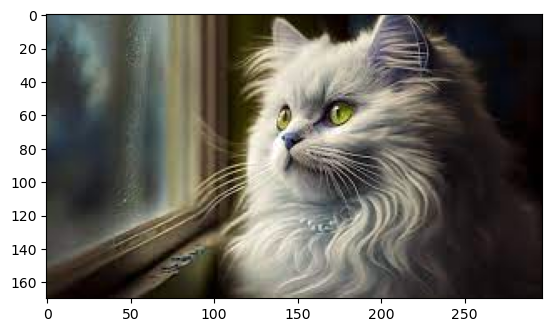

In [19]:
path=r"C:\Users\Admin\Downloads\catimg3.jpeg"
predict_image(path,classifier)

1/1 [==============================] - 0s 92ms/step
probability = 0.76147366
Prediction = dog


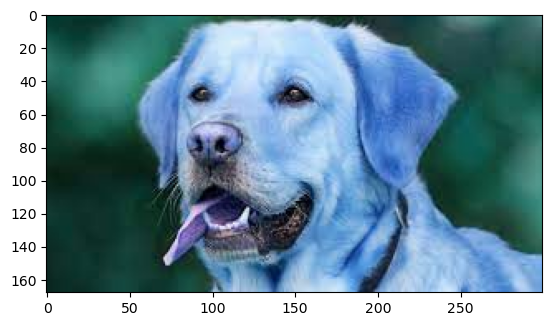

In [20]:
path=r"C:\Users\Admin\Downloads\dog1.jpeg"
predict_image(path,classifier)

1/1 [==============================] - 0s 90ms/step
probability = 0.9919012
Prediction = dog


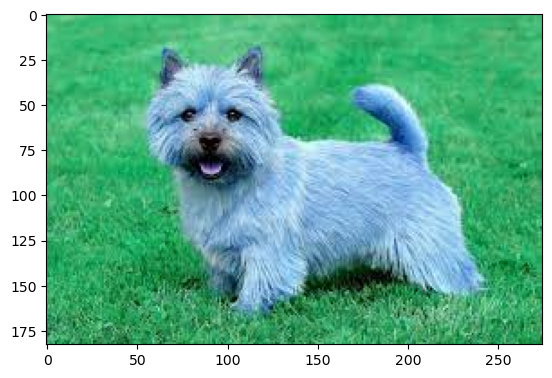

In [21]:
path=r"C:\Users\Admin\Downloads\dog2.jpeg"
predict_image(path,classifier)